In [3]:
!python -m pip install --upgrade pip
!pip install tqdm

In [10]:
import tqdm
from concurrent.futures import ProcessPoolExecutor

# Performance Visualization of Jakobsen's Algorithm

## Setting Paramaters and Getting Plaintext

In [12]:
# Common Values
wordLengths = [10, 15, 20, 25, 50, 75, 100, 200, 300, 400, 500]
numberOfTrials = 100

In [13]:
from src.utils.utils import selectPlainText

def getPlaintextSamples(length, numberOfSamples):

    plaintextSamples = []

    for _ in range(numberOfSamples):
        plaintextSamples.append(selectPlainText(length))

    return plaintextSamples

plaintextSamples = {}
for length in wordLengths:
    print("Getting plaintext samples of length", length, end = '\r')
    plaintextSamples[length] = getPlaintextSamples(length, numberOfTrials)

print(str(numberOfTrials) +" plaintext samples gathered for lengths", ", ".join([str(word) for word in wordLengths]))

KeyboardInterrupt: 

## Computing Data

In [14]:
# Helper function to get results
def getResults(decryptionFunction, plaintextTests, spacesRemoved, max_workers=12):

    # Getting results of Jakobsen's with spaced queries
    results = {}
    executor = ProcessPoolExecutor(max_workers=max_workers)

    for length, plaintextList in plaintextTests.items():
        jobQueue = []
        results[length] = []

        for plaintext in plaintextList:
            jobQueue.append(executor.submit(decryptionFunction, plaintext, length, spacesRemoved))

        for future in tqdm.tqdm(jobQueue, desc="Processing trials of length " + str(length)):
            results[length].append(future.result())

    executor.shutdown()
    return results

In [21]:
# Getting results of standard jakobsensAlgorithm on spaced plaintexts
from src.jakobsensAlgorithm import testJakobsens
testJakobsens("", 50)
resultsSpacedJakobsens = getResults(testJakobsens, plaintextSamples, False, max_workers=12)

NameError: name 'plaintextWords' is not defined

: 

In [9]:
print(resultsSpacedJakobsens[500][:10])

[(26, 1.0), (26, 1.0), (26, 1.0), (24, 1.0), (26, 1.0), (26, 1.0), (26, 1.0), (24, 0.999002493765586), (24, 1.0), (26, 1.0)]


In [10]:
resultsUnspacedJakobsens = getResults(testJakobsens, plaintextSamples, True, max_workers=12)

Processing trials of length 10:   0%|          | 0/100 [00:00<?, ?it/s]

Processing trials of length 500: 100%|██████████| 100/100 [00:17<00:00,  5.85it/s]


In [11]:
# Helper function to get results
def getResultsRandomRestart(decryptionFunction, plaintextTests, numRestarts, spacesRemoved, max_workers=12):

    # Getting results of Jakobsen's with spaced queries
    results = {}
    executor = ProcessPoolExecutor(max_workers=max_workers)

    for length, plaintextList in plaintextTests.items():
        jobQueue = []
        results[length] = []

        for plaintext in plaintextList:
            jobQueue.append(executor.submit(decryptionFunction, plaintext, length, numRestarts=numRestarts, spacesRemoved=spacesRemoved))

        for future in tqdm.tqdm(jobQueue, desc="Processing trials of length " + str(length)):
            results[length].append(future.result())

    executor.shutdown()
    return results

In [12]:
from src.jakobsensAlgorithmRandomStart import testJakobsensRandomRestart

# Getting results of standard jakobsensAlgorithm on unspaced plaintexts
#print(plaintextSamples[10][0])
#print(testJakobsensRandomRestart(plaintextSamples[10][0], 10))
resultsUnspacedJakobsensRandomRestart = getResultsRandomRestart(testJakobsensRandomRestart, plaintextSamples, 5, True, max_workers=30)

Processing trials of length 500: 100%|██████████| 100/100 [00:44<00:00,  2.24it/s]


In [13]:
resultsSpacedJakobsensRandomRestart = getResultsRandomRestart(testJakobsensRandomRestart, plaintextSamples, 5, False, max_workers=60)

Processing trials of length 500: 100%|██████████| 100/100 [00:51<00:00,  1.94it/s]


In [14]:
from src.trigramJakobsens import testJakobsensTrigramRestart
resultsSpacedTrigram = getResultsRandomRestart(testJakobsensTrigramRestart, plaintextSamples, 5, False, max_workers=60)

Processing trials of length 500: 100%|██████████| 100/100 [00:51<00:00,  1.93it/s]


In [15]:
resultsUnspacedTrigram = getResultsRandomRestart(testJakobsensTrigramRestart, plaintextSamples, 5, True, max_workers=60)

Processing trials of length 500: 100%|██████████| 100/100 [00:57<00:00,  1.73it/s]


In [16]:
#from src.jakobsensAlgorithmRandomStart import testJakobsensRandomRestartCheating
#resultsSpacedCheating = getResultsRandomRestart(testJakobsensRandomRestartCheating, plaintextSamples, 5, False, max_workers=30)

In [17]:
#from src.biTriJakobsen import testBiTriJakobsens
#resultsUnspacedBiTrigram = getResults(testBiTriJakobsens, plaintextSamples, True, max_workers=60)

## Formatting and Aggregating Results 

In [18]:
def formatResults(resultsDictionary):

    formattedResultsDictionary = {}
    for length, results in resultsDictionary.items():
        letterResults = [lettersFound for lettersFound, _ in results]
        percentResults = [percentDecoded for _, percentDecoded in results]
        formattedResultsDictionary[length] = (sum(letterResults)/len(letterResults), sum(percentResults)/len(percentResults))
    
    return formattedResultsDictionary

In [19]:
formattedResultsSpacedJakobsens = formatResults(resultsSpacedJakobsens)
formattedResultsUnspacedJakobsens = formatResults(resultsUnspacedJakobsens)
formattedResultsSpacedJakobsensRandomRestart = formatResults(resultsSpacedJakobsensRandomRestart)
formattedResultsUnspacedJakobsensRandomRestart = formatResults(resultsUnspacedJakobsensRandomRestart)
formattedResultsSpacedTrigram = formatResults(resultsSpacedTrigram)
formattedResultsUnspacedTrigram = formatResults(resultsUnspacedTrigram)

## Visualizations

In [20]:
# TODO: Create a function to make boxplots

In [21]:
resultsDictionaries = [formattedResultsSpacedJakobsens, formattedResultsUnspacedJakobsens, formattedResultsSpacedJakobsensRandomRestart, formattedResultsUnspacedJakobsensRandomRestart, formattedResultsSpacedTrigram, formattedResultsUnspacedTrigram]
resultsLabels = ["Spaced Jakobsens", "Spaceless Jakobsons", "Spaced Random Restart", "Spaceless Random Restart", "Spaced Trigram", "Spaceless Trigram"]
resultsLettersSolved = []
resultsPercentSolved = []

for resultsDict in resultsDictionaries:
    lettersSolved = []
    percentSolved = []
    for length, results in resultsDict.items():
        lettersSolved.append(results[0])
        percentSolved.append(results[1])
    resultsLettersSolved.append(lettersSolved)
    resultsPercentSolved.append(percentSolved)

In [22]:
spacedDictionaries = [formattedResultsSpacedJakobsens, formattedResultsSpacedJakobsensRandomRestart, formattedResultsSpacedTrigram]
spacedLabels = ["Jakobsens (Spaced)", "Random Restart (Spaced)", "Trigram (Spaced)"]
spacedLettersSolved = []
spacedPercentSolved = []

for resultsDict in spacedDictionaries:
    lettersSolved = []
    percentSolved = []
    for length, results in resultsDict.items():
        lettersSolved.append(results[0])
        percentSolved.append(results[1])
    spacedLettersSolved.append(lettersSolved)
    spacedPercentSolved.append(percentSolved)


spacelessDictionaries = [formattedResultsUnspacedJakobsens, formattedResultsUnspacedJakobsensRandomRestart, formattedResultsUnspacedTrigram]
spacelessLabels = ["Jakobsens (Spaceless)", "Random Restart (Spaceless)", "Trigram (Spaceless)"]

spacelessLettersSolved = []
spacelessPercentSolved = []
for resultsDict in spacelessDictionaries:
    lettersSolved = []
    percentSolved = []
    for length, results in resultsDict.items():
        lettersSolved.append(results[0])
        percentSolved.append(results[1])
    spacelessLettersSolved.append(lettersSolved)
    spacelessPercentSolved.append(percentSolved)

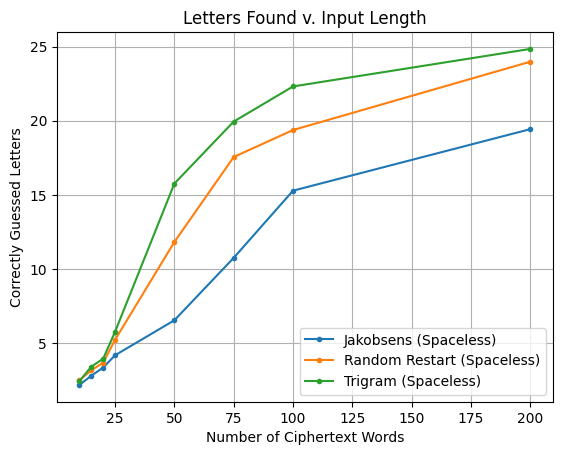

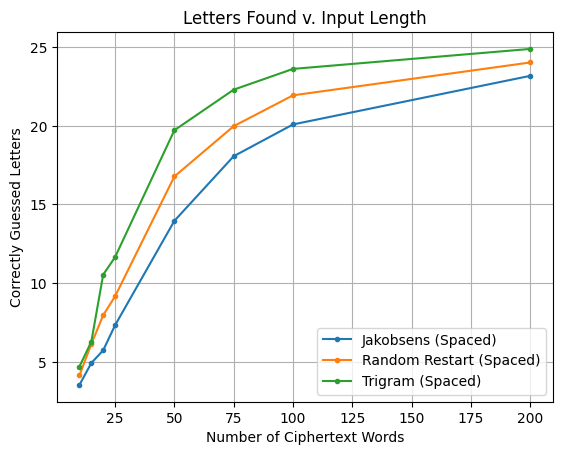

In [23]:
import matplotlib.pyplot as plt

def graphLettersSolved(wordLengths, lettersFound, lettersFoundLabels, cutoff=11): #letters, letters_spaced):

    for i in range(len(lettersFound)):
        plt.plot(wordLengths[:cutoff], lettersFound[i][:cutoff], marker = ".", linestyle = "-", label = lettersFoundLabels[i])
    plt.xlabel('Number of Ciphertext Words')
    plt.ylabel('Correctly Guessed Letters')
    plt.title('Letters Found v. Input Length')
    plt.grid(True)
    plt.legend()
    plt.show()

#graphLettersSolved(wordLengths, resultsLettersSolved, resultsLabels)
graphLettersSolved(wordLengths, spacelessLettersSolved, spacelessLabels, 11)
graphLettersSolved(wordLengths, spacedLettersSolved, spacedLabels, 11)

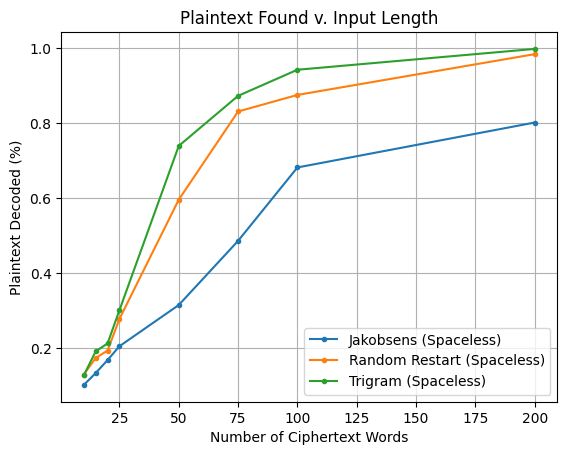

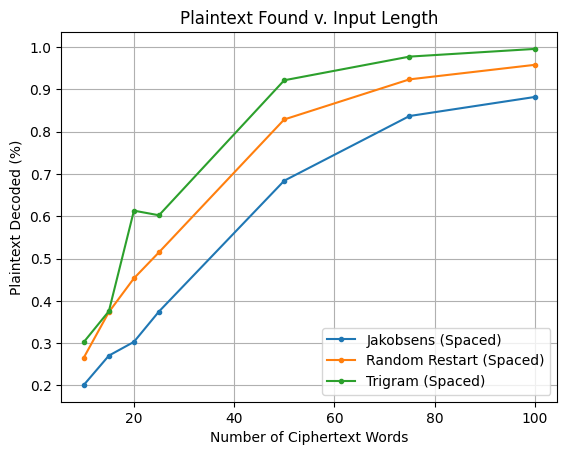

In [24]:
import matplotlib.pyplot as plt

def graphPlaintextSolved(wordLengths, plaintextFound, plaintextFoundLabels, cutoff=11): #letters, letters_spaced):

    for i in range(len(plaintextFound)):
        plt.plot(wordLengths[:cutoff], plaintextFound[i][:cutoff], marker = ".", linestyle='-', label = plaintextFoundLabels[i])
    plt.xlabel('Number of Ciphertext Words')
    plt.ylabel('Plaintext Decoded (%)')
    plt.title('Plaintext Found v. Input Length')
    plt.grid(True)
    plt.legend()
    plt.show()
#graphPlaintextSolved(wordLengths, resultsPercentSolved, resultsLabels)
graphPlaintextSolved(wordLengths, spacelessPercentSolved, spacelessLabels, 8)
graphPlaintextSolved(wordLengths, spacedPercentSolved, spacedLabels, 7)

## Returns Gained from Increasing the Number of Restarts

In [25]:
restartWordLengths = [10, 15, 20, 25, 50, 75, 100]
restartNumberOfTrials = 60


restartPlaintextSamples = {}
for length in restartWordLengths:
    print("Getting plaintext samples of length", length, end = '\r')
    restartPlaintextSamples[length] = getPlaintextSamples(length, restartNumberOfTrials)

print(str(restartNumberOfTrials) +" plaintext samples gathered for lengths", ", ".join([str(word) for word in restartWordLengths]))

60 plaintext samples gathered for lengths 10, 15, 20, 25, 50, 75, 100


In [26]:
from src.jakobsensAlgorithmRandomStart import testJakobsensRandomRestart
numberOfRestarts = [1, 3, 5, 10, 15]

restartTrialSpacedResults = {}

for numRestarts in numberOfRestarts:
    restartTrialSpacedResults[numRestarts] = getResultsRandomRestart(testJakobsensRandomRestart, restartPlaintextSamples, numRestarts, False, max_workers=60)

Processing trials of length 20:   0%|          | 0/60 [00:00<?, ?it/s]

In [ ]:
formattedSpacedRestartTrialResults = {}
for numRestarts, results in restartTrialSpacedResults.items():
    formattedSpacedRestartTrialResults[numRestarts] = formatResults(results)

NameError: name 'formatResults' is not defined

[[0.18422298541324306, 0.21314485269188257, 0.31508133802118105, 0.38636231626165024, 0.6545777254441053, 0.8265936778467895, 0.8678084411771823], [0.2045271391978914, 0.2852553810358118, 0.4056657896059444, 0.4697948757111752, 0.796280044571183, 0.9158061541670007, 0.9655341484724433], [0.2466603571640605, 0.41086565025615923, 0.3999648351345415, 0.5518786815242213, 0.8115726532346142, 0.9096958210047268, 0.9621538470359973], [0.30521388876979155, 0.437253090160412, 0.4840115925179069, 0.6056759754900666, 0.8465931315850121, 0.906645385279318, 0.9670055935592773], [0.3333134558316677, 0.4283138686329884, 0.4932236297040655, 0.6345260723452764, 0.8193311280178348, 0.8961479030921108, 0.9702678531569203]]


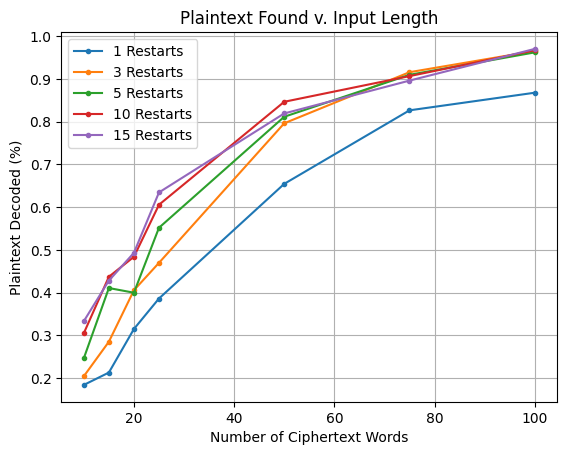

In [ ]:
restartLabels = []
restartPlaintextSolved = []
restartLettersSolved = []

for numRestarts, resultDict in formattedSpacedRestartTrialResults.items():
    restartLabels.append(str(numRestarts) + " Restarts")
    lettersSolved = []
    percentSolved = []
    for length, results in resultDict.items():
        lettersSolved.append(results[0])
        percentSolved.append(results[1])
    restartLettersSolved.append(lettersSolved)
    restartPlaintextSolved.append(percentSolved)

graphPlaintextSolved(restartWordLengths, restartPlaintextSolved, restartLabels)

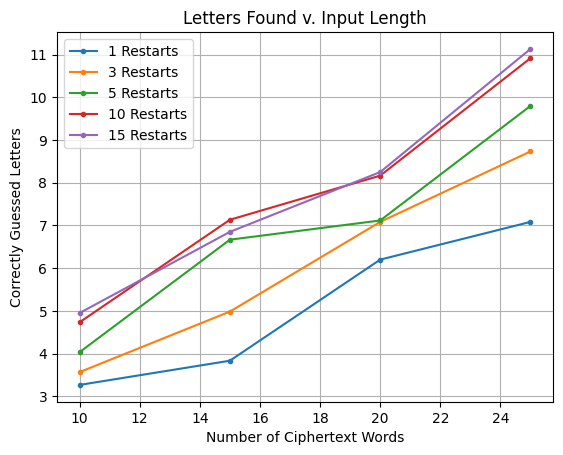

In [ ]:
graphLettersSolved(restartWordLengths, restartLettersSolved, restartLabels)

# Bigram-Trigram Aware Jakobsen's Algorithm

In [ ]:
from src.trigramJakobsens import testJakobsensTrigramRepeatedIteration
# Helper function to get results
def getResultsBiTrigram(plaintextTests, numRestarts, spacesRemoved, max_workers=12):

    # Getting results of Jakobsen's with spaced queries
    results = {
        "InitialBigram" : {},
        "InitialTrigram" : {},
        "SecondBigram" : {},
        "SecondTrigram" : {}
    }
    executor = ProcessPoolExecutor(max_workers=max_workers)

    for length, plaintextList in plaintextTests.items():
        jobQueue = []
        results[length] = []

        for plaintext in plaintextList:
            jobQueue.append(executor.submit(testJakobsensTrigramRepeatedIteration, plaintext, length, numRestarts=numRestarts, spacesRemoved=spacesRemoved))

        for future in tqdm.tqdm(jobQueue, desc="Processing trials of length " + str(length)):
            initBigram, initTrigram, secondBigram, secondTrigram = future.result()
            results["InitialBigram"][length].append(initBigram)
            results["InitialTrigram"][length].append(initTrigram)
            results["SecondBigram"][length].append(secondBigram)
            results["SecondTrigram"][length].append(secondTrigram)
#    return (biLettersCorrect, biPlaintextCorrect), (triLettersCorrect, triPlaintextCorrect), (secondBiLettersCorrect, secondBiPlaintextCorrect), (secondTriLettersCorrect, secondTriPlaintextCorrect)


    executor.shutdown()
    return results

In [ ]:
resultsBiTrigramSpaced = getResultsBiTrigram(plaintextSamples, 5, False, max_workers=60)

In [ ]:
resultsBiTrigramSpaceless = getResultsBiTrigram(plaintextSamples, 5, True, max_workers=60)

In [ ]:
def formatResultsBiTri(resultsDictionary):

    formattedResultsDictionary = {}
    for stageName, subResultDictionary in resultsDictionary.items():
        formattedResultsDictionary[stageName] = {}
        for length, results in subResultDictionary.items():
            letterResults = [lettersFound for lettersFound, _ in results]
            percentResults = [percentDecoded for _, percentDecoded in results]
            formattedResultsDictionary[stageName][length] = (sum(letterResults)/len(letterResults), sum(percentResults)/len(percentResults))

    return formattedResultsDictionary

In [ ]:
formattedResultsBiTriSpaced = formatResultsBiTri(resultsBiTrigramSpaced)
formattedResultsBiTriSpacless = formatResultsBiTri(resultsBiTrigramSpaceless)

In [ ]:
biTriLabels = ["Initial Bigram", "Initial Trigram", "Second Bigram", "Second Trigram"]
biTriPlaintextSolved = []
biTriLettersSolved = []

for _, resultDict in formattedResultsBiTriSpaced.items():
    lettersSolved = []
    percentSolved = []
    for length, results in resultDict.items():
        lettersSolved.append(results[0])
        percentSolved.append(results[1])
    biTriPlaintextSolved.append(lettersSolved)
    biTriLettersSolved.append(percentSolved)

graphPlaintextSolved(restartWordLengths, restartPlaintextSolved, restartLabels)